<a href="https://colab.research.google.com/github/hopeboldizar/neuro-spring-23/blob/main/final_project_spring_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
# import necessary programs
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [52]:
# import data sets
url1 = 'https://raw.githubusercontent.com/hopeboldizar/neuro-spring-23/main/alzheimers_IDs_final_project.xlsx%20-%20SEA-AD_Cohort_Metadata.csv'
alzh_ID = pd.read_csv(url1)
url2 = 'https://raw.githubusercontent.com/hopeboldizar/neuro-spring-23/main/alzheimers_pathology_final_project%20-%20alzheimers_pathology_final_project%20(1).csv'
alzh_path = pd.read_csv(url2)
url3 = 'https://raw.githubusercontent.com/hopeboldizar/neuro-spring-23/main/alzh%20data%20set%20-%20Sheet1%20(1).csv' 
alzh_combinedset = pd.read_csv(url3)


In [14]:
# create variables 
sex = alzh_ID.iloc[:,4]
cog_status = alzh_ID.iloc[:,17]
brain_pH = alzh_ID.iloc[:,52]
RIN = alzh_ID.iloc[:,-1]
positiveobject_greymatter = alzh_path.iloc[:,92]
positiveobject_layer1 = alzh_path.iloc[:,93]

Text(0.5, 1.0, 'Distribution of RIN Score')

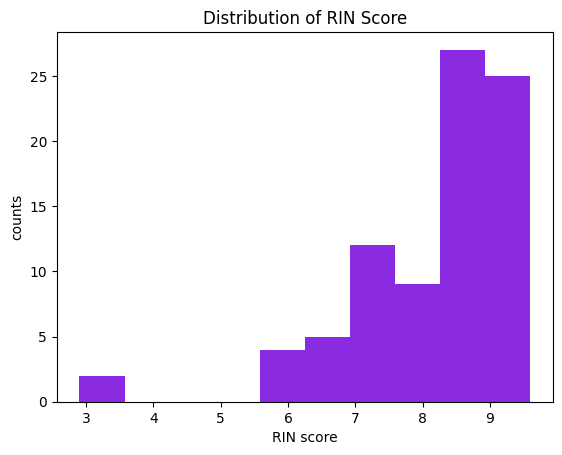

In [15]:
# create histogram
plt.hist(RIN, color = 'blueviolet')
plt.xlabel('RIN score')
plt.ylabel('counts')
plt.title('Distribution of RIN Score')

Text(0.5, 1.0, 'Distribution of Brain pH')

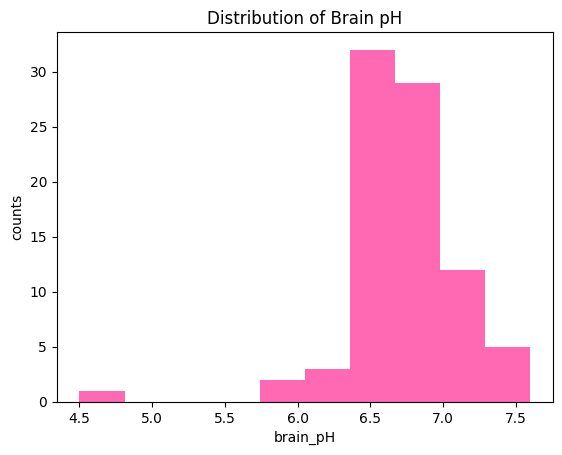

In [16]:
plt.hist(brain_pH, color = 'hotpink')
plt.xlabel('brain_pH')
plt.ylabel('counts')
plt.title('Distribution of Brain pH')

Text(0.5, 1.0, 'Distribution of Number of 6e10 Positive Objects Grey Matter')

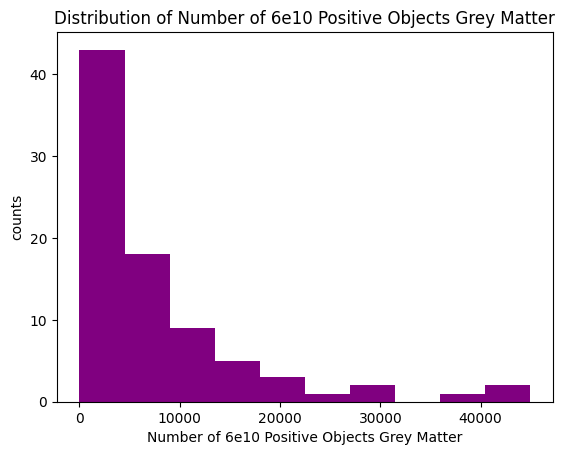

In [17]:
plt.hist(positiveobject_greymatter, color = 'purple')
plt.xlabel('Number of 6e10 Positive Objects Grey Matter')
plt.ylabel('counts')
plt.title('Distribution of Number of 6e10 Positive Objects Grey Matter')

Text(0.5, 1.0, 'Distribution of Number of 6e10 Positive Objects Layer 1')

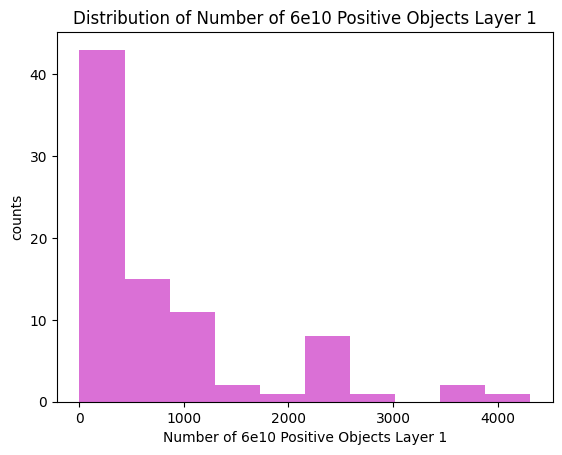

In [18]:
plt.hist(positiveobject_layer1, color = 'orchid')
plt.xlabel('Number of 6e10 Positive Objects Layer 1')
plt.ylabel('counts')
plt.title('Distribution of Number of 6e10 Positive Objects Layer 1')

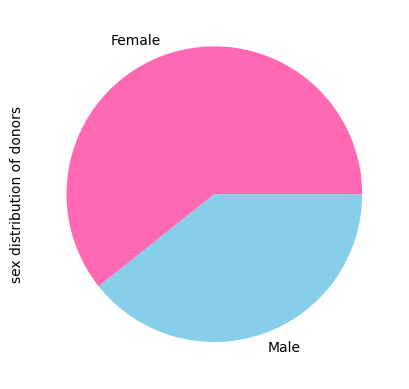

In [35]:
# make a pie chart
colors = ['hotpink','skyblue']
alzh_ID['Sex'].value_counts().plot(kind='pie', colors=colors)

# Add y label
plt.ylabel('sex distribution of donors')

# Show the plot!
plt.show()

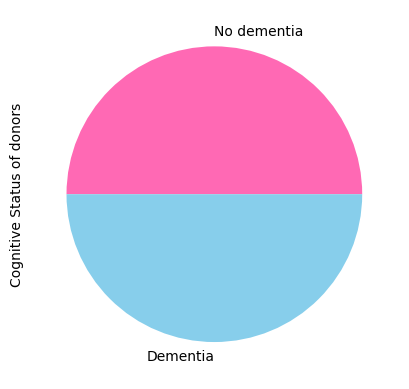

In [43]:
# make a pie chart
colors = ['hotpink','skyblue']
alzh_ID['Cognitive Status'].value_counts().plot(kind='pie', colors=colors)

# Add y label
plt.ylabel('Cognitive Status of donors')

# Show the plot!
plt.show()

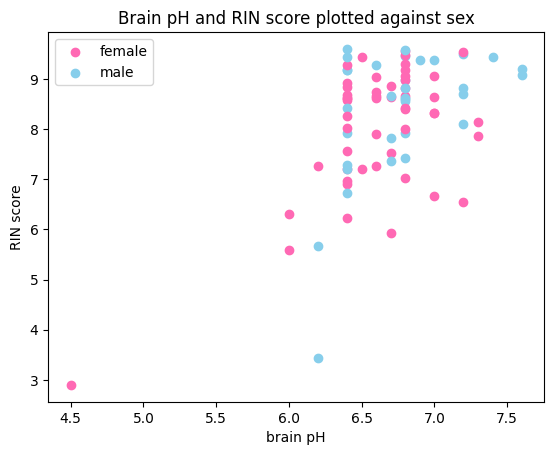

In [51]:
# making scatter plot

alzh_ID_length = len(alzh_ID)

for i in range(alzh_ID_length):
  if alzh_ID.iloc[i,4] == 'Female':
    plt.scatter(alzh_ID.iloc[i,52],alzh_ID.iloc[i,-1],color = "hotpink")
  else:
    plt.scatter(alzh_ID.iloc[i,52],alzh_ID.iloc[i,-1],color = "skyblue")
    plt.xlabel('brain pH')
    plt.ylabel('RIN score')
    plt.title('Brain pH and RIN score plotted against sex')

plt.legend(['female','male'])


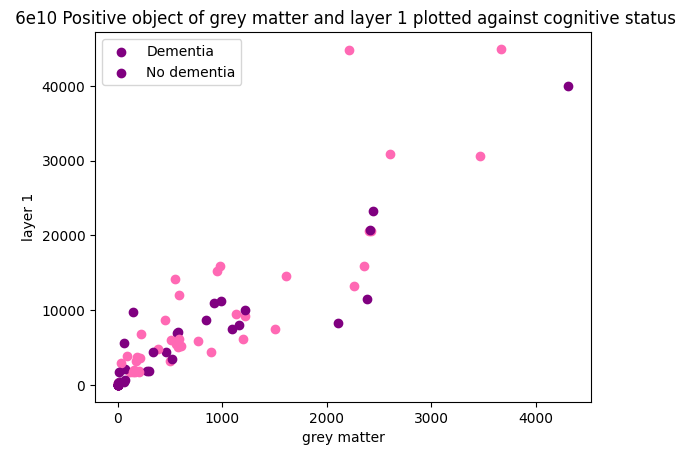

In [56]:
alzh_combinedset_length = len(alzh_combinedset)

for i in range(alzh_combinedset_length):
  if alzh_combinedset.iloc[i,-1] == 'Dementia':
    plt.scatter(alzh_combinedset.iloc[i,-2],alzh_combinedset.iloc[i,-3],color = "hotpink")
  else:
    plt.scatter(alzh_combinedset.iloc[i,-2],alzh_combinedset.iloc[i,-3],color = "purple")
    plt.xlabel('grey matter')
    plt.ylabel('layer 1')
    plt.title(' 6e10 Positive object of grey matter and layer 1 plotted against cognitive status')

plt.legend(['Dementia', 'No dementia'])

In [62]:
# make variables into numpy arrays
female_RIN = np.array(alzh_combinedset.loc[alzh_combinedset['Sex'] == 'Female', ['RIN']])
female_brainpH = np.array(alzh_combinedset.loc[alzh_combinedset['Sex'] == 'Female', ['Brain pH']])
male_RIN = np.array(alzh_combinedset.loc[alzh_combinedset['Sex'] == 'Male', ['RIN']])
male_brainpH = np.array(alzh_combinedset.loc[alzh_combinedset['Sex'] == 'Male', ['Brain pH']])
ND_gmatter = np.array(alzh_combinedset.loc[alzh_combinedset['Cognitive Status'] == 'No dementia', ['number of 6e10 positive objects_Grey matter']])
ND_layer1 = np.array(alzh_combinedset.loc[alzh_combinedset['Cognitive Status'] == 'No dementia', ['number of 6e10 positive objects_Layer1']])
D_gmatter = np.array(alzh_combinedset.loc[alzh_combinedset['Cognitive Status'] == 'Dementia', ['number of 6e10 positive objects_Grey matter']])
D_layer1 = np.array(alzh_combinedset.loc[alzh_combinedset['Cognitive Status'] == 'Dementia', ['number of 6e10 positive objects_Layer1']])

[Text(0.5, 1.0, '6e10 layer 1 distribution')]

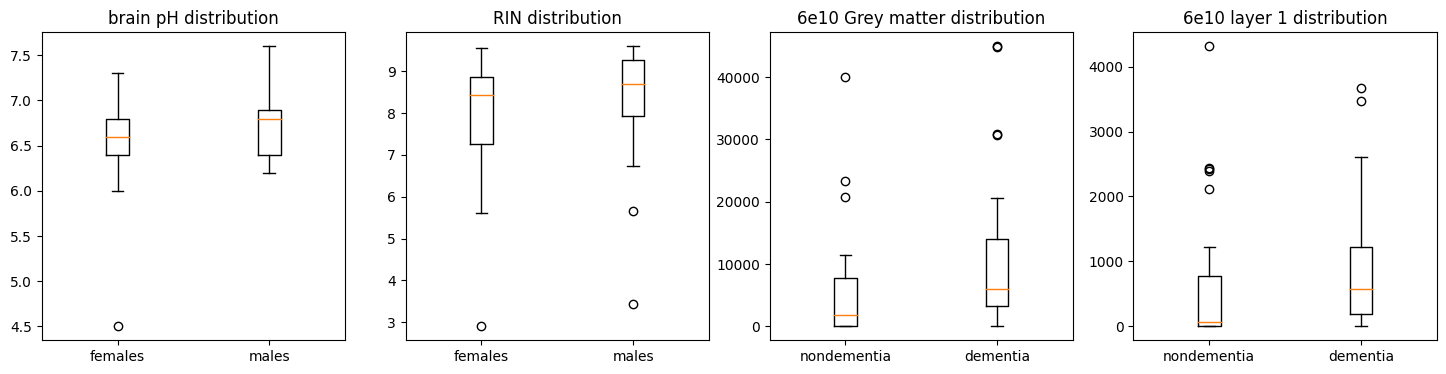

In [66]:
# make box plots
fig, ax = plt.subplots(1,4, figsize = (18,4))
#brain pH
brainph = [female_brainpH.flatten(), male_brainpH.flatten()]
ax[0].boxplot(brainph)
ax[0].set_xticklabels(['females', 'males'])
ax[0].set(title = 'brain pH distribution')
#RIN
rin = [female_RIN.flatten(), male_RIN.flatten()]
ax[1].boxplot(rin)
ax[1].set_xticklabels(['females', 'males'])
ax[1].set(title = 'RIN distribution')
#grey matter
gmatter = [ND_gmatter.flatten(), D_gmatter.flatten()]
ax[2].boxplot(gmatter)
ax[2].set_xticklabels(['nondementia', 'dementia'])
ax[2].set(title = '6e10 Grey matter distribution')
#RIN
layer1 = [ND_layer1.flatten(), D_layer1.flatten()]
ax[3].boxplot(layer1)
ax[3].set_xticklabels(['nondementia', 'dementia'])
ax[3].set(title = '6e10 layer 1 distribution')

In [68]:
stats.mannwhitneyu(female_brainpH, male_brainpH)

MannwhitneyuResult(statistic=array([714.5]), pvalue=array([0.23750131]))

In [69]:
stats.mannwhitneyu(female_RIN, male_RIN)

MannwhitneyuResult(statistic=array([648.]), pvalue=array([0.07707144]))

In [70]:
stats.mannwhitneyu(ND_gmatter, D_gmatter)

MannwhitneyuResult(statistic=array([532.]), pvalue=array([0.00176792]))

In [71]:
stats.mannwhitneyu(ND_layer1, D_layer1)

MannwhitneyuResult(statistic=array([541.5]), pvalue=array([0.00234543]))

In [72]:
stats.skewtest(brain_pH)

SkewtestResult(statistic=-4.536684577914547, pvalue=5.714547634271498e-06)